In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from matplotlib import rc_params
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler

**Importing Dataset**

In [2]:
 df = pd.read_csv("https://raw.githubusercontent.com/AftabAhmedAbro/Smoke-Detection-Machine-Learning/main/smoke_detection_iot.csv")
df.head

<bound method NDFrame.head of        Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  \
0               0  1654733331          20.000        57.36          0   
1               1  1654733332          20.015        56.67          0   
2               2  1654733333          20.029        55.96          0   
3               3  1654733334          20.044        55.28          0   
4               4  1654733335          20.059        54.69          0   
...           ...         ...             ...          ...        ...   
62625       62625  1655130047          18.438        15.79        625   
62626       62626  1655130048          18.653        15.87        612   
62627       62627  1655130049          18.867        15.84        627   
62628       62628  1655130050          19.083        16.04        638   
62629       62629  1655130051          19.299        16.52        643   

       eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  \
0            400

***Data Overview***

In [3]:
df.info

<bound method DataFrame.info of        Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  \
0               0  1654733331          20.000        57.36          0   
1               1  1654733332          20.015        56.67          0   
2               2  1654733333          20.029        55.96          0   
3               3  1654733334          20.044        55.28          0   
4               4  1654733335          20.059        54.69          0   
...           ...         ...             ...          ...        ...   
62625       62625  1655130047          18.438        15.79        625   
62626       62626  1655130048          18.653        15.87        612   
62627       62627  1655130049          18.867        15.84        627   
62628       62628  1655130050          19.083        16.04        638   
62629       62629  1655130051          19.299        16.52        643   

       eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  \
0            4

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature[C],62630.0,15.970424,14.359576,-22.010,10.99425,20.130,25.4095,59.930
Humidity[%],62630.0,48.539499,8.865367,10.740,47.53000,50.150,53.2400,75.200
TVOC[ppb],62630.0,1942.057528,7811.589055,0.000,130.00000,981.000,1189.0000,60000.000
eCO2[ppm],62630.0,670.021044,1905.885439,400.000,400.00000,400.000,438.0000,60000.000
Raw H2,62630.0,12942.453936,272.464305,10668.000,12830.00000,12924.000,13109.0000,13803.000
Raw Ethanol,62630.0,19754.257912,609.513156,15317.000,19435.00000,19501.000,20078.0000,21410.000
Pressure[hPa],62630.0,938.627649,1.331344,930.852,938.70000,938.816,939.4180,939.861
PM1.0,62630.0,100.594309,922.524245,0.000,1.28000,1.810,2.0900,14333.690
PM2.5,62630.0,184.467770,1976.305615,0.000,1.34000,1.880,2.1800,45432.260
NC0.5,62630.0,491.463608,4265.661251,0.000,8.82000,12.450,14.4200,61482.030


**Dropping the Coloumns**

As Unnamed 0 coloumn consist of serial number so it is not important enough also "UTC" coloumn is not important as it has only timestamps.

In [9]:
df.drop(['Unnamed: 0', 'UTC'], axis = 1, inplace = True)

KeyError: ignored

**Missing Value Check**

In [10]:
Total = df.isnull().sum().sort_values(ascending = False)          
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Temperature[C],0,0.0
Humidity[%],0,0.0
TVOC[ppb],0,0.0
eCO2[ppm],0,0.0
Raw H2,0,0.0
Raw Ethanol,0,0.0
Pressure[hPa],0,0.0
PM1.0,0,0.0
PM2.5,0,0.0
NC0.5,0,0.0


**Exploratory Data Analysis**

Statistical Summary of the Data:


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature[C],62630.0,15.970424,14.359576,-22.010,10.99425,20.130,25.4095,59.930
Humidity[%],62630.0,48.539499,8.865367,10.740,47.53000,50.150,53.2400,75.200
TVOC[ppb],62630.0,1942.057528,7811.589055,0.000,130.00000,981.000,1189.0000,60000.000
eCO2[ppm],62630.0,670.021044,1905.885439,400.000,400.00000,400.000,438.0000,60000.000
Raw H2,62630.0,12942.453936,272.464305,10668.000,12830.00000,12924.000,13109.0000,13803.000
Raw Ethanol,62630.0,19754.257912,609.513156,15317.000,19435.00000,19501.000,20078.0000,21410.000
Pressure[hPa],62630.0,938.627649,1.331344,930.852,938.70000,938.816,939.4180,939.861
PM1.0,62630.0,100.594309,922.524245,0.000,1.28000,1.810,2.0900,14333.690
PM2.5,62630.0,184.467770,1976.305615,0.000,1.34000,1.880,2.1800,45432.260
NC0.5,62630.0,491.463608,4265.661251,0.000,8.82000,12.450,14.4200,61482.030


*Plotting Correlations between Independent Features and the Target Variable*


<ipython-input-12-1d916b047bfa>:7: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  subplot.set_xticks([0, 1], ['No Alarm', 'Alarm'])
<ipython-input-12-1d916b047bfa>:7: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  subplot.set_xticks([0, 1], ['No Alarm', 'Alarm'])
<ipython-input-12-1d916b047bfa>:7: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  subplot.set_xticks([0, 1], ['No Alarm', 'Alarm'])
<ipython-input-12-1d916b047bfa>:7: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter wil

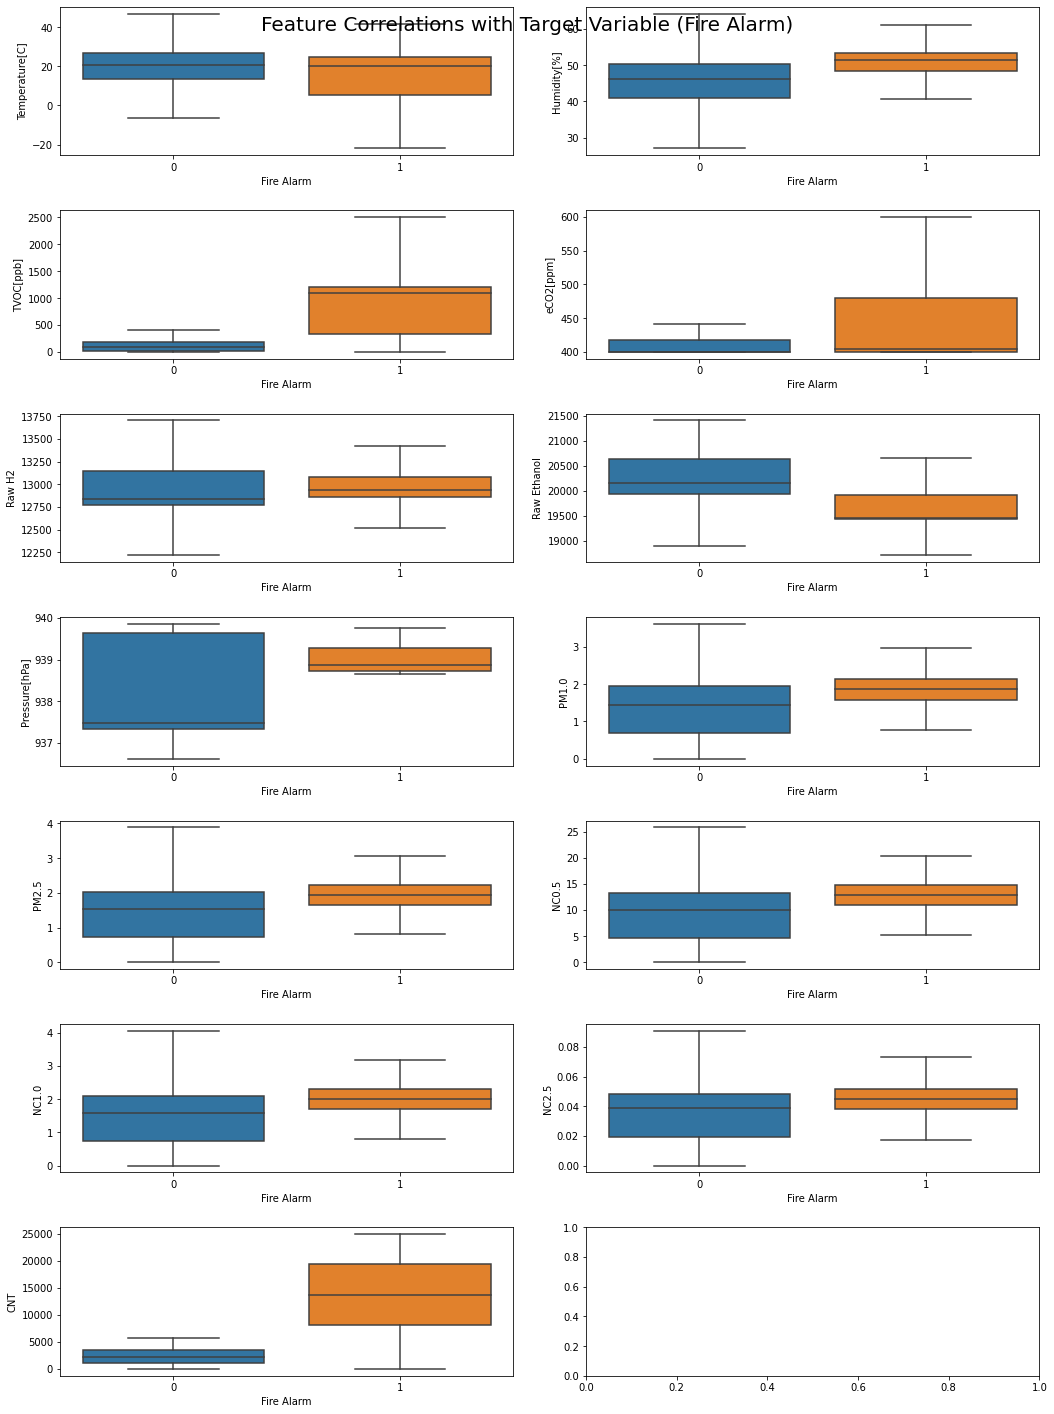

In [12]:
fig, ax = plt.subplots(nrows = 7, ncols = 2, figsize = (15, 20))

for feature, subplot in zip(df, ax.flatten()):
    if feature == 'Fire Alarm':
        continue
    sns.boxplot(x = df['Fire Alarm'], y = df[feature], showfliers = False, ax = subplot)
    subplot.set_xticks([0, 1], ['No Alarm', 'Alarm'])

plt.suptitle('Feature Correlations with Target Variable (Fire Alarm)', fontsize = 20)
plt.tight_layout(pad = 2)
plt.show()

**Correlation Matrix**

In [13]:
corr = df.corr()
corr

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
Temperature[C],1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.089850,-0.163902
Humidity[%],-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.251965,0.399846
TVOC[ppb],0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.057703,-0.214743
eCO2[ppm],0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.106681,-0.097006
Raw H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,-0.031036,0.107007
Raw Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.511995,-0.340652
Pressure[hPa],-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.186290,0.249797
PM1.0,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.093700,-0.110552
PM2.5,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.083869,-0.084916
NC0.5,0.039291,-0.277389,0.670657,0.699604,-0.587769,-0.529186,-0.248657,0.940045,0.798873,1.000000,0.786274,0.626711,-0.094741,-0.128118


**Correlation Heat Map**

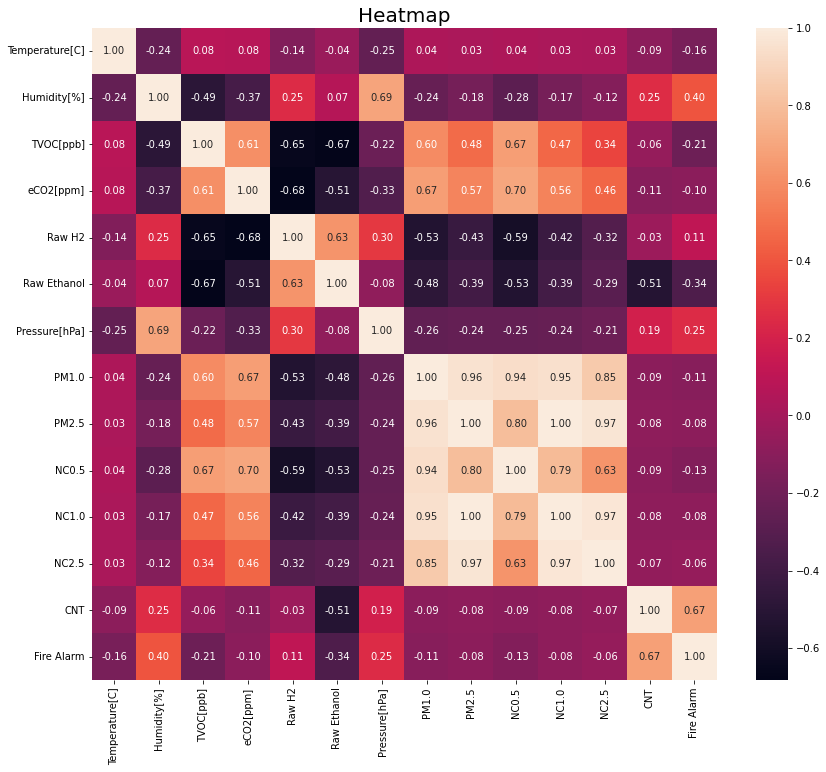

In [14]:
plt.figure(figsize = (14, 12))
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.title('Heatmap', fontsize = 20)
plt.show()

In [15]:
# Removing highly correlated features having correlation > 0.90
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
df = df.drop(to_drop, axis=1)
print(df)
#data.info()

       Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  \
0              20.000        57.36          0        400   12306        18520   
1              20.015        56.67          0        400   12345        18651   
2              20.029        55.96          0        400   12374        18764   
3              20.044        55.28          0        400   12390        18849   
4              20.059        54.69          0        400   12403        18921   
...               ...          ...        ...        ...     ...          ...   
62625          18.438        15.79        625        400   13723        20569   
62626          18.653        15.87        612        400   13731        20588   
62627          18.867        15.84        627        400   13725        20582   
62628          19.083        16.04        638        400   13712        20566   
62629          19.299        16.52        643        400   13696        20543   

       Pressure[hPa]  PM1.0

<ipython-input-15-41b2b78b0c22>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [16]:
corr1 = df.corr()
corr1

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,CNT,Fire Alarm
Temperature[C],1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,-0.089850,-0.163902
Humidity[%],-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,0.251965,0.399846
TVOC[ppb],0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,-0.057703,-0.214743
eCO2[ppm],0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,-0.106681,-0.097006
Raw H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.031036,0.107007
Raw Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.511995,-0.340652
Pressure[hPa],-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,0.186290,0.249797
PM1.0,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,-0.093700,-0.110552
CNT,-0.089850,0.251965,-0.057703,-0.106681,-0.031036,-0.511995,0.186290,-0.093700,1.000000,0.673762
Fire Alarm,-0.163902,0.399846,-0.214743,-0.097006,0.107007,-0.340652,0.249797,-0.110552,0.673762,1.000000


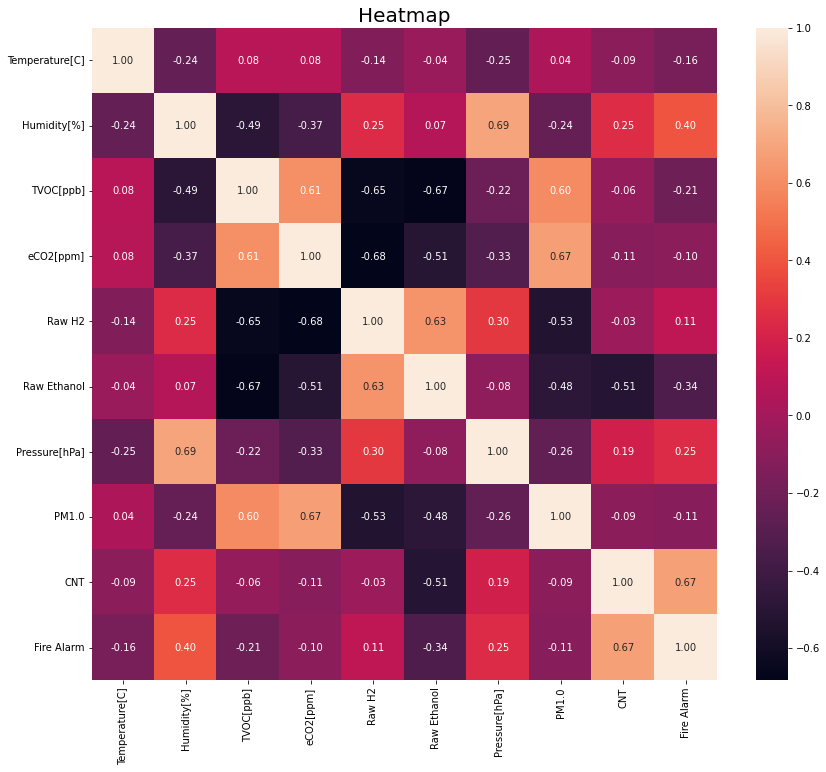

In [17]:
plt.figure(figsize = (14, 12))
sns.heatmap(corr1, annot = True, fmt = '.2f')
plt.title('Heatmap', fontsize = 20)
plt.show()

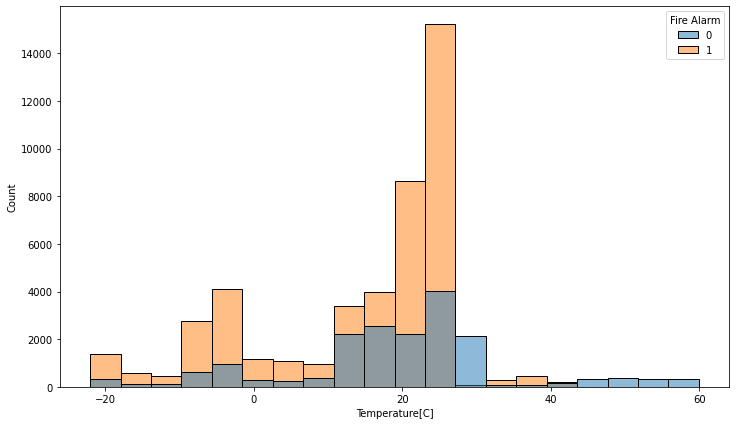

In [18]:
plt.figure(figsize = (12, 7))
sns.histplot(df, x = "Temperature[C]", bins = 20, hue = "Fire Alarm", )
plt.show()

**Class Imbalance**

*Despite the fact that the data include some significant multicollinearities, we will initially try a naive method of creating classification models without eliminating the multicollinearities. We shall eliminate the multicollinearities and retry if the naïve technique does not produce good results.*

**Data Pre-processing**

Splitting the Dependent and the Independent Variables:

In [19]:
y = df['Fire Alarm']
x = df.drop('Fire Alarm', axis = 1)

Splitting the Data into Training and Testing Sets:

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((50104, 9), (12526, 9), (50104,), (12526,))

** Scalling Data**

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

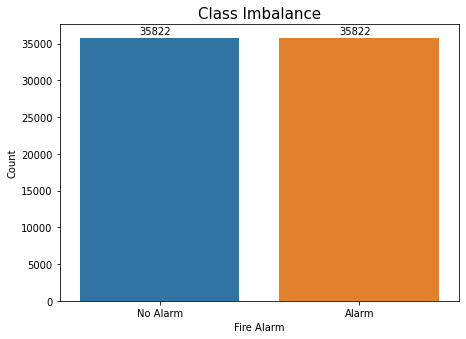

In [24]:
sns.countplot(x = Y_train)
plt.text(x = 0 - 0.1, y = Y_train.value_counts()[0] + 500, s = Y_train.value_counts()[0])
plt.text(x = 1 - 0.1, y = Y_train.value_counts()[1] + 500, s = Y_train.value_counts()[1])
plt.xticks([0, 1], ['No Alarm', 'Alarm'])
plt.ylabel('Count')
plt.tight_layout(pad = -1)
plt.title('Class Imbalance', fontsize = 15)
plt.show()

It is clear that the target classes are imbalanced. This needs to be addressed before building any model.



Over-Sampling the Minority Class using SMOTE (Synthetic Minority Over-sampling Technique)
**for preventing Class imbalance**

In [23]:
smote = SMOTE(random_state = 10) 
X_train, Y_train = smote.fit_resample(X_train, Y_train)

Re-checking if the Target Classes are Balanced:

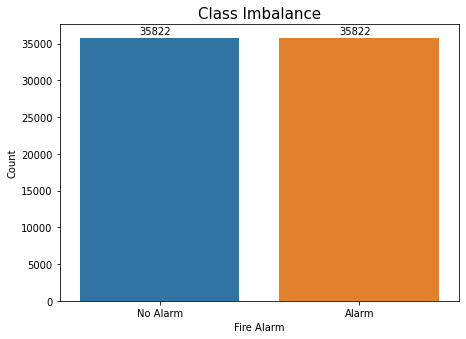

In [25]:
sns.countplot(x = Y_train)
plt.text(x = 0 - 0.1, y = Y_train.value_counts()[0] + 500, s = Y_train.value_counts()[0])
plt.text(x = 1 - 0.1, y = Y_train.value_counts()[1] + 500, s = Y_train.value_counts()[1])
plt.xticks([0, 1], ['No Alarm', 'Alarm'])
plt.ylabel('Count')
plt.tight_layout(pad = -1)
plt.title('Class Imbalance', fontsize = 15)
plt.show()

The target classes are now balanced in the training set, making it feasible for model building.

In [34]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, Y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

[1 0 0 ... 0 1 1]


In [27]:
model = LogisticRegression()
model.fit(X_train, Y_train)
logreg_accuracy = model.score(X_test, Y_test)
print(f"Accuracy of Logistic Regression Model : {logreg_accuracy}")
logreg_predict = model.predict(X_test)

Accuracy of Logistic Regression Model : 0.9860290595561233


In [28]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
destre_accuracy = model.score(X_test, Y_test)
print(f"Accuracy of Decision Tree Model : {destre_accuracy}")
destre_predict = model.predict(X_test)

Accuracy of Decision Tree Model : 0.979402842088456


In [29]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
rf_accuracy = model.score(X_test, Y_test)
print(f"Accuracy of Random Forest Model : {rf_accuracy}")
rf_predict = model.predict(X_test)

Accuracy of Random Forest Model : 0.9998403321092129


In [31]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, Y_train)
ada_accuracy = model.score(X_test, Y_test)
print(f"Accuracy of AdaBoost Model : {ada_accuracy}")
ada_predict = model.predict(X_test)

Accuracy of AdaBoost Model : 0.9016445792751078


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)
Gad_accuracy = model.score(X_test, Y_test)
print(f"Accuracy of AdaBoost Model : {Gad_accuracy}")
gad_predict = model.predict(X_test)

Accuracy of AdaBoost Model : 0.9976049816381926


In [30]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
history=ann.fit(x=X_train,y=Y_train,validation_data=(X_test,Y_test),batch_size=20,epochs=15)
y_pred=ann.predict(X_test)

y_pred=list(y_pred)

for i in range(len(y_pred)):
    if y_pred[i] >= .5:
        y_pred[i]=1
    else : y_pred[i]=0

ann.evaluate(X_test,Y_test)
history.history

Epoch 1/15
3583/3583 [==============================] - 11s 2ms/step - loss: 0.1679 - accuracy: 0.9555 - val_loss: 0.0492 - val_accuracy: 0.9887
Epoch 2/15
3583/3583 [==============================] - 7s 2ms/step - loss: 0.0335 - accuracy: 0.9931 - val_loss: 0.0265 - val_accuracy: 0.9930
Epoch 3/15
3583/3583 [==============================] - 11s 3ms/step - loss: 0.0182 - accuracy: 0.9961 - val_loss: 0.0153 - val_accuracy: 0.9974
Epoch 4/15
3583/3583 [==============================] - 9s 3ms/step - loss: 0.0115 - accuracy: 0.9983 - val_loss: 0.0098 - val_accuracy: 0.9990
Epoch 5/15
3583/3583 [==============================] - 14s 4ms/step - loss: 0.0079 - accuracy: 0.9994 - val_loss: 0.0068 - val_accuracy: 0.9995
Epoch 6/15
3583/3583 [==============================] - 7s 2ms/step - loss: 0.0057 - accuracy: 0.9996 - val_loss: 0.0050 - val_accuracy: 0.9996
Epoch 7/15
3583/3583 [==============================] - 7s 2ms/step - loss: 0.0046 - accuracy: 0.9996 - val_loss: 0.0042 - val_accura

{'loss': [0.1679462045431137,
  0.03346100077033043,
  0.01819167099893093,
  0.011501278728246689,
  0.007880029268562794,
  0.005738422740250826,
  0.004596199840307236,
  0.003806991735473275,
  0.003327189711853862,
  0.0029816781170666218,
  0.002738491864874959,
  0.002492688363417983,
  0.0023896205238997936,
  0.0022554390598088503,
  0.002218647627159953],
 'accuracy': [0.9554603099822998,
  0.9931466579437256,
  0.9961336851119995,
  0.9983250498771667,
  0.9994277358055115,
  0.9995812773704529,
  0.9995812773704529,
  0.9996370673179626,
  0.9995952248573303,
  0.9995812773704529,
  0.9996510744094849,
  0.9996650218963623,
  0.9995812773704529,
  0.9996091723442078,
  0.9995393753051758],
 'val_loss': [0.04920501261949539,
  0.026534251868724823,
  0.0152656901627779,
  0.00977798830717802,
  0.006762785371392965,
  0.005016297567635775,
  0.00418712617829442,
  0.004635400604456663,
  0.003563436446711421,
  0.0027509848587214947,
  0.0025025957729667425,
  0.002296188380